In [3]:
using Random, Distributions
using StatsBase, Statistics, LinearAlgebra, Plots

#### generate some data that is not linearly separable, that is no linear function can separate them, this example starts off with a cluster in the center and the data surrounding it around an approximate radius

In [4]:

function GenerateDataNotLinearlySeparable(NN = 100, radius = 10)
    points = []
    for i in 1:NN
        x_tmp = 0
        y_tmp = 0
        if(i < Int(round(NN/2))) #center cluster data
            x_tmp, y_tmp = rand(Normal(0,1),2)
            push!(points,[x_tmp,y_tmp,"red"])            
        else #periphery circle perimenter < rr = rand() * 2pi; sqrt( (10sin(rr))^2 + (10cos(rr))^2 )) >
            angle = rand() * 2pi
            x_tmp = radius*cos(angle) + rand(Normal(0,0.1),1)[1]
            y_tmp = radius*sin(angle) + rand(Normal(0,0.1),1)[1]
            push!(points,[x_tmp,y_tmp,"blue"])            
        end
    end
    return points
end

GenerateDataNotLinearlySeparable (generic function with 3 methods)

In [5]:
points = GenerateDataNotLinearlySeparable()

100-element Vector{Any}:
 Any[-0.9960870521569225, 1.7089627281444382, "red"]
 Any[1.9970615705022214, -0.13778272571754713, "red"]
 Any[1.0650417017677318, 1.1632088505844655, "red"]
 Any[-0.8204574374962016, -0.5127553123442818, "red"]
 Any[0.24551893340192116, 1.5158840560863436, "red"]
 Any[-0.45136381435049083, 1.2862875780232117, "red"]
 Any[1.1813370953680749, 0.9389761962405239, "red"]
 Any[1.124731396154549, -0.60848330761631, "red"]
 Any[0.8286773503262436, 0.27800402619906683, "red"]
 Any[-0.05293345806827782, -0.311975391829509, "red"]
 Any[-1.0029716611274448, -0.4796334903004826, "red"]
 Any[0.42887651596299436, 0.05164449723173598, "red"]
 Any[-0.10392906596275298, -1.093044854804354, "red"]
 ⋮
 Any[-8.227640566069232, 5.558842283796053, "blue"]
 Any[8.614061479939284, -5.185088155994315, "blue"]
 Any[-8.471239537464134, -5.398101115041877, "blue"]
 Any[1.4606721736118842, 9.954119899513742, "blue"]
 Any[2.4701597860014393, 9.574150622197742, "blue"]
 Any[-8.226369364988

In [6]:
point_new = [ 1 , 1 ]

2-element Vector{Int64}:
 1
 1

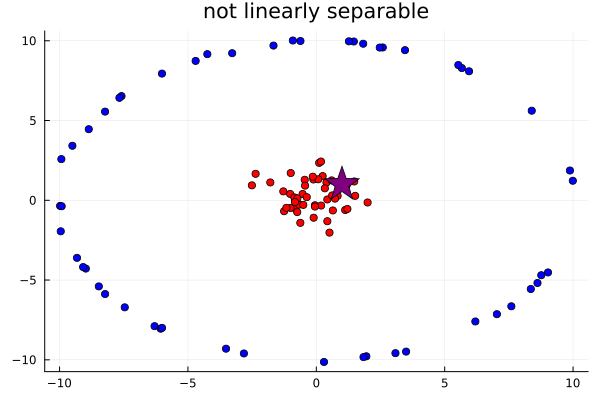

In [7]:
scatter( map(x->x[1],points) , map(x->x[2],points) , markercolor= map(x->x[3],points) , title="not linearly separable" , legend=false )
scatter!( [point_new[1]] , [point_new[2]] , markershape=:star , markersize=18 , markercolor = "purple" )

### we have more data than dimensions

### now make the Kernel matrix with kernel $k(x_i,x_j) = e^{-||x_i-x_j||^2}$

In [8]:
function kernel1(xi,xj) 
    return exp( (-1/10) * sum(map(x->abs(x), xi[1:2] .- xj[1:2] ))^2 )
end

kernel1 (generic function with 1 method)

In [9]:
kernel1( points[1] , points[2] )

0.09609120684979235

In [10]:
kernal_mat = zeros(length(points),length(points))
[ kernal_mat[i,j] = kernel1(points[i],points[j])  for i in 1:length(points) for j in 1:length(points) ];
kernal_mat

100×100 Matrix{Float64}:
 1.0          0.0960912    0.506828     …  3.38569e-12  2.08731e-8
 0.0960912    1.0          0.60736         2.20957e-6   3.86105e-7
 0.506828     0.60736      1.0             8.21058e-9   9.33784e-7
 0.562858     0.360883     0.281281        4.61459e-9   5.94788e-11
 0.81397      0.313629     0.871617        2.92046e-10  3.04075e-7
 0.91066      0.223214     0.764303     …  7.1545e-11   2.88348e-8
 0.419487     0.698969     0.988471        2.05551e-8   7.23221e-7
 0.139482     0.834959     0.715055        8.69368e-7   1.2325e-8
 0.346465     0.778054     0.881798        4.62459e-8   5.85777e-8
 0.415371     0.609753     0.510458        2.14874e-8   1.05732e-9
 0.617539     0.327319     0.252323     …  2.52711e-9   3.75217e-11
 0.386723     0.734239     0.736787        2.93755e-8   1.11906e-8
 0.255461     0.392952     0.30937         1.41789e-7   9.01855e-11
 ⋮                                      ⋱               
 4.64455e-6   9.79777e-12  7.28828e-9      3.

In [11]:
kernal_mat = kernal_mat .- mean( kernal_mat ) #centering

100×100 Matrix{Float64}:
  0.828941   -0.0749679   0.335769  …  -0.170991  -0.171059  -0.171059
 -0.0749679   0.828941    0.436301     -0.171059  -0.171057  -0.171059
  0.335769    0.436301    0.828941     -0.171059  -0.171059  -0.171058
  0.391799    0.189824    0.110222     -0.171059  -0.171059  -0.171059
  0.642911    0.14257     0.700558     -0.171056  -0.171059  -0.171059
  0.739601    0.0521554   0.593244  …  -0.17105   -0.171059  -0.171059
  0.248428    0.52791     0.817412     -0.171059  -0.171059  -0.171058
 -0.031577    0.663899    0.543996     -0.171059  -0.171058  -0.171059
  0.175406    0.606995    0.710739     -0.171059  -0.171059  -0.171059
  0.244312    0.438694    0.339399     -0.171059  -0.171059  -0.171059
  0.44648     0.15626     0.081264  …  -0.171059  -0.171059  -0.171059
  0.215664    0.56318     0.565728     -0.171059  -0.171059  -0.171059
  0.0844018   0.221893    0.138311     -0.171059  -0.171059  -0.171059
  ⋮                                 ⋱               

In [12]:
eigvecs_kernel = eigvecs( kernal_mat )

100×100 Matrix{Float64}:
 -0.0549749  -0.275244     -0.236378     …  -0.0985617    0.111463
 -0.0869189   0.0520868     0.175116        -0.0267467    0.0865442
 -0.0501249   0.107302     -0.219858        -0.233182     0.119315
 -0.0368363  -0.0925897     0.0230165        0.191734     0.148746
 -0.0387686   0.105012      0.153108        -0.220472     0.1321
 -0.0279892  -0.153425      0.107317     …  -0.126477     0.146808
 -0.0503497   0.0309082    -0.206858        -0.204897     0.120807
 -0.0515257   0.113501      0.172254         0.0428919    0.121815
 -0.0289208  -0.25551       0.0389061       -0.0781932    0.151176
 -0.0177607  -0.0359401    -0.2624           0.0858075    0.1676
 -0.0414202  -0.0533854     0.133731     …   0.196769     0.142927
 -0.0157596  -0.265599     -0.0894402       -0.0149477    0.166665
 -0.0485512  -0.00736302   -0.123501         0.158658     0.133319
  ⋮                                      ⋱               
 -0.132381   -0.000983257   6.32911e-5       0.00

In [13]:
eigvals_kernel = eigvals( kernal_mat )

100-element Vector{Float64}:
 -7.355269839196227
 -0.46162938990876634
 -0.4406694470204349
 -0.34642548227135345
 -0.20105863915440975
 -0.17368251854920583
 -0.12963952477166782
 -0.11971640197208368
 -0.09324513438957759
 -0.08678077187850732
 -0.06472642106876295
 -0.05788426044512942
 -0.048001939670344454
  ⋮
  2.166483755291624
  2.771250460797201
  2.9913863345289005
  3.372523132231417
  3.4310353888112033
  3.6970846922406277
  4.010788928620979
  4.374662037294129
  5.576589620393863
  6.045466621094764
  7.0331851967562224
 25.707124797230243

In [14]:
vals = sort(eigvals_kernel,rev=true)[1:2]
inds = map( v -> findall( eigvals_kernel .== v )[1] , vals )

2-element Vector{Int64}:
 100
  99

In [19]:
phi_vecs = kernal_mat[ : , inds ]

100×2 Matrix{Float64}:
 -0.171059    -0.171059
 -0.171059    -0.171057
 -0.171058    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171058    -0.171059
 -0.171059    -0.171058
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
  ⋮           
 -0.171059    -0.171059
 -0.171059     0.720613
 -0.171059    -0.171059
 -0.12487     -0.171059
  0.00674322  -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.171059    -0.171059
 -0.134252    -0.171059
 -0.170949    -0.171059
 -0.171059     0.828941
  0.828941    -0.171059

In [20]:
function Point2HigherDim( point_new , points ) #find the point projection in the higher dimension
    map( i -> kernel1( point_new , points[i] ) , 1:length(points) )
end

Point2HigherDim (generic function with 1 method)

In [21]:
Point2HigherDim( points[1] , points ) #map first point

100-element Vector{Float64}:
 1.0
 0.09609120684979235
 0.5068279381714965
 0.5628581828945107
 0.813969806287757
 0.9106597300203814
 0.4194869041500997
 0.13948207744691035
 0.3464650631550574
 0.4153706732148188
 0.6175386592573665
 0.3867231916760522
 0.25546089721372134
 ⋮
 4.6445508417449895e-6
 1.4801764132931059e-12
 5.822604235710983e-10
 1.061649688077941e-5
 2.6521463323891688e-6
 2.9258675503167253e-10
 2.3413348605703236e-6
 3.211680772106356e-8
 1.555827494208294e-5
 6.855667219729762e-5
 3.3856880026815523e-12
 2.087313041730536e-8

In [22]:
#map all original points
points_higherDim = map( i -> Point2HigherDim( points[i] , points ) , 1:length(points) );
println( length( points_higherDim ) )
println( length( points_higherDim[1] ) )

100
100


In [23]:
phi_vecs' * points_higherDim[1] # 1 point projection

2-element Vector{Float64}:
 -4.6053337825264435
 -4.605344373181585

In [24]:
points_projection = map( i -> phi_vecs' * points_higherDim[i] , 1:length(points_higherDim) )
println( points_projection[1] )
length( points_projection )

[-4.6053337825264435, -4.605344373181585]


100

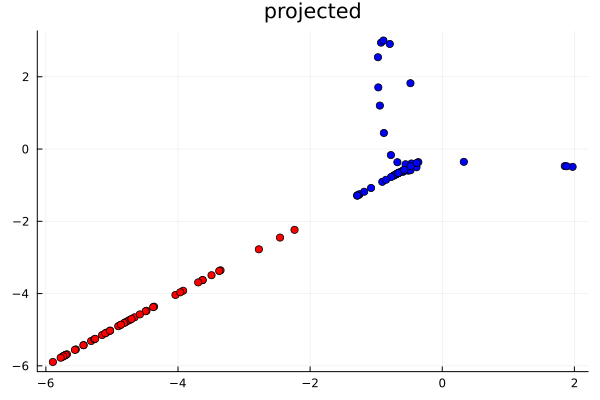

In [19]:
scatter( map(x->x[1],points_projection) , map(x->x[2],points_projection) , markercolor= map(x->x[3],points) , title="projected" , legend=false )

In [20]:
point_new_high_Dim = phi_vecs' * Point2HigherDim( point_new , points ) 

2-element Vector{Float64}:
 -4.686353056229395
 -4.685476036707563

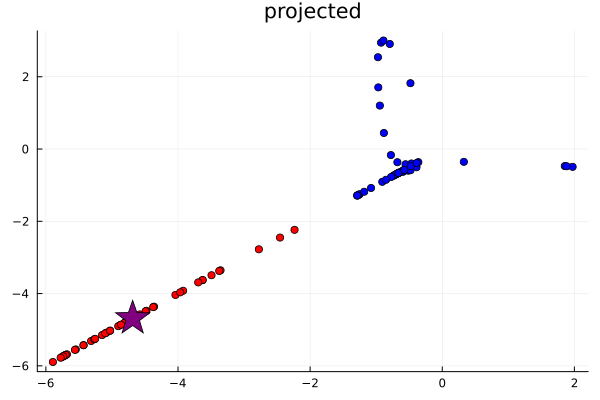

In [21]:
scatter( map(x->x[1],points_projection) , map(x->x[2],points_projection) , markercolor= map(x->x[3],points) , title="projected" , legend=false )
scatter!( [point_new_high_Dim[1]] , [point_new_high_Dim[2]] , markershape=:star , markersize=18 , markercolor = "purple" )

In [22]:
using RDatasets

In [23]:
iris = dataset("datasets","iris");

In [43]:
iris_X = Matrix(iris[:,1:4])
iris_Y = Vector(iris[:,5]);

In [406]:
kernel_type = "rbf"
function kernelIris(xi,xj)
    if( kernel_type == "polynomial" )
        
        return (xi' * xj + 4)^2
    elseif( kernel_type == "rbf" )
        h = 1/2
        diff = xi .- xj
        sum_tmp = sum( diff.^2 ) ./ std(iris_X)^2
        return 1/2 * exp( (-1) * h * ( sum_tmp ) )
        #return exp( (-1/10) * sum(map(x->abs(x), xi[1:2] .- xj[1:2] ))^2 )
    end
end

kernelIris (generic function with 1 method)

In [407]:
kernelIris( iris_X[1,:] , iris_X[133,:]   )

0.023635876321037145

In [408]:
kernal_mat = zeros(150,150)
[ kernal_mat[i,j] = kernelIris(iris_X[i,:],iris_X[j,:])  for i in 1:150 for j in 1:150 ];
kernal_mat;

In [409]:
kernal_mat = kernal_mat .- mean( kernal_mat ) ;#centering

In [410]:
eigvecs_kernel = eigvecs( kernal_mat );

In [411]:
eigvals_kernel = eigvals( kernal_mat );

In [412]:
vals = sort(eigvals_kernel,rev=true)[1:2]
inds = map( v -> findall( eigvals_kernel .== v )[1] , vals )

2-element Vector{Int64}:
 150
 149

In [413]:
phi_vecs = kernal_mat[ : , inds ];

In [414]:
function Point2HigherDim( point_new , points ) #find the point projection in the higher dimension
    map( i -> kernelIris( point_new , points[i,:] ) , 1:150 )
end

Point2HigherDim (generic function with 1 method)

In [415]:
Point2HigherDim( iris_X[1,:] , iris_X ) ;#map first point

In [416]:
#map all original points
points_higherDim = map( i -> Point2HigherDim( iris_X[i,:] , iris_X ) , 1:150 );
println( length( points_higherDim ) )
println( length( points_higherDim[1] ) );

150
150


In [417]:
phi_vecs' * points_higherDim[1] # 1 point projection

2-element Vector{Float64}:
 -3.492962130746504
 -4.664929596234954

In [418]:
points_projection = map( i -> phi_vecs' * points_higherDim[i] , 1:150 )
println( points_projection[1] )
length( points_projection );

[-3.492962130746504, -4.664929596234954]


In [419]:
cols = []
shapes = []
for i in 1:150
    if(i<51)
        push!(cols,"red")
        push!(shapes,:square)
    elseif(i<101)
        push!(cols,"blue")
        push!(shapes,:circle)
    else
        push!(cols,"green")
        push!(shapes,:star)
    end
end
cols;

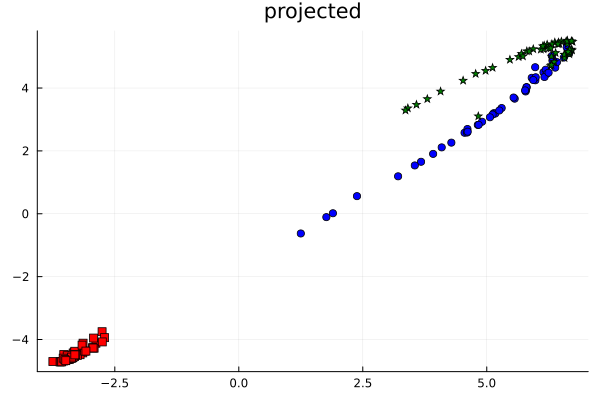

In [420]:
p = scatter( map(x->x[1],points_projection) , map(x->x[2],points_projection), markershapes=shapes, markercolor=cols , title="projected" , legend=false )
display( p ) 

In [390]:
savefig(p,"irisKPCA.png")

"/home/tasty/Documents/repos/JuliaPlottingExploration/PCA/irisKPCA.png"